In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import polars as pl

# Invisible Influencers – Investigating YouTube’s Bot Phenomenon 

___
### The YouNiverse Dataset - Preprocessing
___

___
### Analysis of the Bot-Like Users
___

#### Analysis of the Bot-Targeted Channels

In [19]:
# Load Dataset of Suspicious (Bot-like) Users

df_sus = pl.read_parquet('./data/suspicious_users_2018_metadata.parquet')

df_sus

author,video_id,upload_date,comments,likes,replies,categories,channel_id,dislike_count,duration,like_count,view_count
i64,str,date,u32,i64,i64,str,str,f64,i64,f64,f64
571286317,"""Psuy2CcO5zA""",2018-12-31,22,6,0,"""People & Blogs""","""UCzWmWTPCafQRNl9q9Y53AfQ""",2070.0,384,68947.0,1.840976e6
345657268,"""2S7Yak00e6E""",2018-12-10,9,1274,0,"""People & Blogs""","""UCzWmWTPCafQRNl9q9Y53AfQ""",855.0,311,64364.0,1.433561e6
394100970,"""2S7Yak00e6E""",2018-12-10,9,122,0,"""People & Blogs""","""UCzWmWTPCafQRNl9q9Y53AfQ""",855.0,311,64364.0,1.433561e6
92908462,"""qoqZ9T5O29g""",2018-09-18,25,4,0,"""People & Blogs""","""UCzWmWTPCafQRNl9q9Y53AfQ""",2021.0,427,107645.0,2.081952e6
338214411,"""qoqZ9T5O29g""",2018-09-18,13,14,0,"""People & Blogs""","""UCzWmWTPCafQRNl9q9Y53AfQ""",2021.0,427,107645.0,2.081952e6
…,…,…,…,…,…,…,…,…,…,…,…
150882843,"""8DumVjLgQiM""",2018-08-24,11,4,0,"""News & Politics""","""UCrwE8kVqtIUVUzKui2WVpuQ""",73.0,1552,893.0,27139.0
54116756,"""IZdKtqovYnQ""",2018-08-23,11,26,6,"""News & Politics""","""UCrwE8kVqtIUVUzKui2WVpuQ""",382.0,1137,1290.0,64250.0
288090181,"""IZdKtqovYnQ""",2018-08-23,9,0,0,"""News & Politics""","""UCrwE8kVqtIUVUzKui2WVpuQ""",382.0,1137,1290.0,64250.0


In [ ]:
df_sus_cat = df_sus.select(["author", "comments", "categories"]).sort(by="comments", descending=True)

df_sus_cat

author,comments,categories
i64,u32,str
219760968,23475,"""Entertainment"""
333172471,18421,"""News & Politics"""
314699484,12530,"""Music"""
311898076,10227,"""Science & Technology"""
298514026,9890,"""Education"""
…,…,…
472784185,9,"""News & Politics"""
92298838,9,"""News & Politics"""
351912403,9,"""News & Politics"""


$\bullet$ We see that some users comment up to 20k comments under a single video. 

$\bullet$ Let us analyse the categories of videos targeted by bots, we will weight each category by the number of bot comments it received.

In [32]:
df_com_per_cat = df_sus_cat.group_by("categories").agg(pl.col("comments").sum()).sort(by="comments", descending=False)

df_com_per_cat.head()

categories,comments
str,u32
"""""",165
"""Nonprofits & Activism""",387066
"""Pets & Animals""",901938
"""Travel & Events""",1525025
"""Autos & Vehicles""",2340995


In [35]:
# Get rid of the blank category

df_com_per_cat = df_com_per_cat.filter(pl.col("categories")!="").sort(by="comments", descending=True)

df_com_per_cat.head()

categories,comments
str,u32
"""Entertainment""",16269000
"""Gaming""",14110826
"""People & Blogs""",11966287
"""Howto & Style""",9721603
"""Music""",7292729


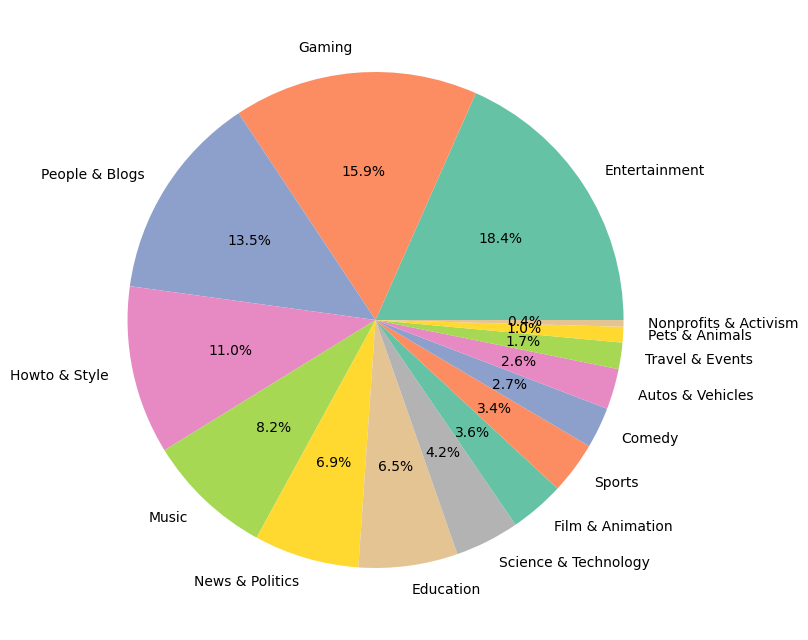

In [37]:
plt.figure(figsize=(8, 12))

plt.pie(x=df_com_per_cat["comments"], labels=df_com_per_cat["categories"], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.show()

$\Rightarrow$ We need to compare to the initial ditribution of video categories to see if some categories are actually more probable of being targeted by bots, or if it is equiprobable.  

In terms of probability, we computed hereabove $P(Category|Bots)$, but we would like to know 'What is the probability of seeing a video of category C being targeted by bots?' i.e. $P(Bots|Category) = \frac{P(Category|Bots)P(Bots)}{P(Category)}$. We can find the other probabilities by going back to the initial dataset and simply counting the number of categories, as well as the number of total comments compared to the bot-like comments.

#### Analysis of the Number of Videos Targeted by Bots